In [1]:
searchfile = open("d=10.txt", "r")
error=[]
for line in searchfile:
    if "error:" in line: 
        st=line.index('error:')+7
        en =line.index('; A')
        er=float(line[st:en-1])
        error.append(er)
searchfile.close()

searchfile = open("d=10_6L.txt", "r")
error_t=[]
True_Value=[]
Calculated_Value=[]

for line in searchfile:
    if "error:" in line: 
        st=line.index('error:')+7
        en =line.index('Average')
        er=float(line[st:en-3])
        error_t.append(er)
        
        st=line.index('True value:')+12
        en =line.index('; calculated value:')
        t=float(line[st:en])
        True_Value.append(t)
        
        st=en+20
        en =line.index('; error:')
        c=float(line[st:en])
        Calculated_Value.append(c)

searchfile.close()

In [2]:
True_Value

[5.852,
 9.933,
 10.31,
 6.096,
 7.693,
 5.79,
 6.845,
 5.9,
 7.929,
 6.379,
 7.258,
 7.516,
 7.192,
 8.906,
 6.989,
 7.538,
 4.852,
 8.837,
 6.568,
 6.835,
 9.978,
 8.562,
 5.933,
 8.142,
 6.164,
 5.637,
 7.124,
 7.322,
 8.837,
 7.528,
 5.254,
 5.718,
 6.233,
 7.897,
 5.79,
 7.674,
 7.141,
 7.105,
 6.06,
 6.691,
 5.492,
 6.665,
 5.578,
 7.638,
 6.048,
 6.943,
 7.768,
 7.561,
 7.414,
 7.455,
 6.056,
 7.199,
 8.841,
 5.166,
 8.459,
 7.111,
 7.717,
 4.965,
 7.31,
 9.16,
 6.944,
 6.331,
 7.545,
 12.54,
 5.091,
 6.489,
 6.848,
 7.637,
 9.883,
 7.52,
 6.322,
 4.886,
 7.398,
 4.618,
 10.09,
 9.842,
 5.524,
 8.317,
 6.07,
 9.865,
 6.082,
 5.937,
 6.567,
 5.365,
 7.654,
 7.15,
 5.771,
 7.392,
 6.017,
 7.654,
 8.126,
 6.808,
 7.392,
 7.676,
 7.543,
 8.07,
 7.274,
 6.587,
 5.631,
 6.877,
 7.517,
 6.009,
 6.213,
 8.071,
 5.181,
 6.403,
 5.54,
 7.941,
 10.47,
 9.327,
 6.958,
 6.789,
 6.18,
 4.823,
 8.995,
 6.798,
 9.257,
 7.928,
 6.811,
 8.037,
 5.616,
 7.418,
 8.216,
 5.487,
 7.581,
 6.12,
 5.987

In [3]:
import numpy as np
import scipy.stats

C:\Users\ahmedadel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


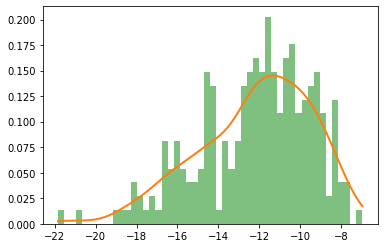

In [11]:
bw =  None
kde = scipy.stats.gaussian_kde(error_t,bw_method=bw) 


# plot (normalized) histogram of the data
import matplotlib.pyplot as plt 
plt.hist(error_t, 50, normed=1, facecolor='green', alpha=0.5);

# plot density estimates
t_range = np.linspace(min(error_t),max(error_t),len(error_t))
plt.plot(t_range,kde(t_range),lw=2)


In [5]:
std_dev, mean=np.std(error), np.mean(error)
std_dev_t, mean_t=np.std(error_t), np.mean(error_t)

In [6]:
print(std_dev_t, mean_t)


2.732003248812149 -12.202188755020082


In [7]:
Corrected_Value=[]
Corrected_error=[]
for i in range(len(Calculated_Value)):
    Corrected_Value.append(Calculated_Value[i]/(1+mean*0.01))
    Corrected_error.append(((True_Value[i]-Corrected_Value[i])/True_Value[i])*100)
    

In [8]:
std_dev_c, mean_c=np.std(Corrected_error), np.mean(Corrected_error)

In [9]:
print(std_dev_c, mean_c)

3.109476385413294 0.07005781471893142


C:\Users\ahmedadel\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


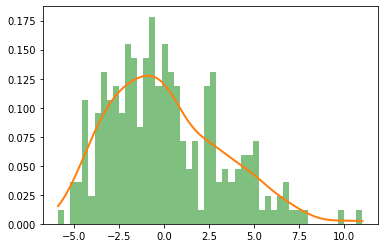

In [10]:
bw =  None
kde = scipy.stats.gaussian_kde(Corrected_error,bw_method=bw) 


# plot (normalized) histogram of the data
import matplotlib.pyplot as plt 
plt.hist(Corrected_error, 50, normed=1, facecolor='green', alpha=0.5);

# plot density estimates
t_range = np.linspace(min(Corrected_error),max(Corrected_error),len(Corrected_error))
plt.plot(t_range,kde(t_range),lw=2)
